In [1]:
# Importing relevalnt libraries
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.set()
sns.set_style('white')
pd.options.display.float_format = '{:,.2f}'.format

# Breif Description on the companies


**Nasper (NPN.JO) - Is a global internet group and one of the largest technology investors in the world.

**BHP (BHP.JO) - Is a world-leading resources company. They extract and process minerals, oil and gas.

**COMPAGNIE FINANCIERE RICHEMONT SA (CFR.JO) - Richemont is the owner of prestigious Maisons, recognised for their excellence in jewellery, watches, fashion and accessories, and distinguished by their craftsmanship and creativity.



In [37]:
#Creating a list of the ticker of the companies to extract data from yahoo finance
# Stock price data is from 2018-01-01 to 2021-10-18
ticker = ['NPN.JO', 'BHP.JO', 'CFR.JO']
#Creating and empty Data Frame for the data to be imported
finance_data = pd.DataFrame()
finance_data[ticker] = wb.DataReader(ticker, data_source ='yahoo', start = '2018-1-1')['Adj Close']

In [38]:
#Viewing the top 5 and last 5 rows of the data
print(finance_data.head())
print(finance_data.tail())

               NPN.JO    BHP.JO    CFR.JO
Date                                     
2018-01-02 223,276.78 20,579.12 10,202.43
2018-01-03 227,585.30 20,910.29 10,345.71
2018-01-04 226,756.64 20,976.04 10,342.04
2018-01-05 225,492.75 21,063.70 10,296.11
2018-01-08 224,282.48 21,657.87 10,516.54
               NPN.JO    BHP.JO    CFR.JO
Date                                     
2021-10-12 251,100.00 39,816.00 16,378.00
2021-10-13 254,591.00 39,260.00 16,647.00
2021-10-14 255,481.00 40,526.00 17,420.00
2021-10-15 256,998.00 40,264.00 17,480.00
2021-10-18 255,100.00 40,150.00 17,326.00


In [39]:
#Creating data frames
NPN = pd.DataFrame(finance_data['NPN.JO'])
BHP = pd.DataFrame(finance_data['BHP.JO'])
CFR = pd.DataFrame(finance_data['CFR.JO'])

# Line graph to how the trend of the stock prices

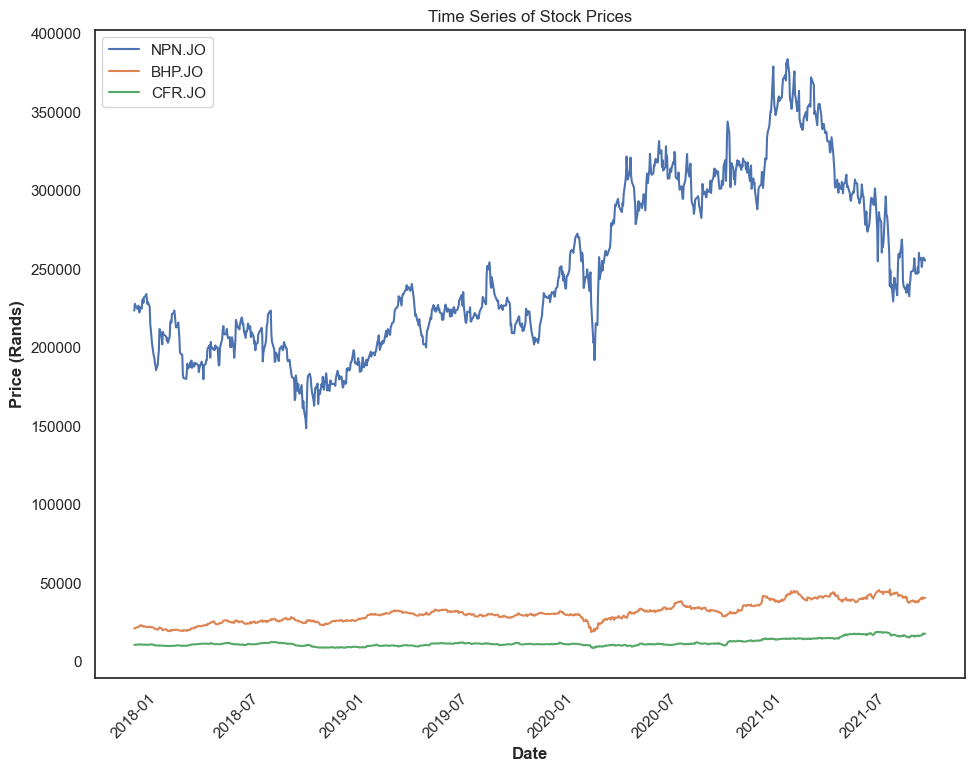

In [40]:
#Time series of the three stock one the same chart
pd.to_datetime(NPN.index)
labels = ['NPN.JO', 'BHP.JO', 'CFR.JO']

plt.plot(NPN.index, NPN['NPN.JO'])
plt.plot(NPN.index, BHP['BHP.JO'])
plt.plot(NPN.index, CFR['CFR.JO'])
plt.title('Time Series of Stock Prices')
plt.ylabel('Price (Rands)', fontweight = 'bold')
plt.xlabel('Date', fontweight = 'bold')
plt.legend(loc = 'upper left', labels = labels)
plt.xticks(rotation = 45)
plt.show()

In [41]:
#Creating variables for the statistics to be use
log_returns_npn = np.log(1 + NPN.pct_change())
log_returns_bhp = np.log(1 + BHP.pct_change())
log_returns_cfr = np.log(1 + CFR.pct_change())

mean_npn = log_returns_npn.mean()
mean_bhp = log_returns_bhp.mean()
mean_cfr = log_returns_cfr.mean()

var_npn = log_returns_npn.var()
var_bhp = log_returns_bhp.var()
var_cfr = log_returns_cfr.var()

drift_npn = mean_npn - (0.5 *var_npn)
drift_bhp = mean_bhp - (0.5 *var_bhp)
drift_cfr = mean_cfr - (0.5 *var_cfr)

stdev_npn = log_returns_npn.std()
stdev_bhp = log_returns_bhp.std()
stdev_cfr = log_returns_cfr.std()

#Determing the number of intervals and iterations
t_intervals = 250 #predicting 250 days
n_iterations = 1000 # a 1000 simulations to be run

daily_returns_npn = np.exp(drift_npn.values + stdev_npn.values * norm.ppf(np.random.rand(t_intervals, n_iterations)))
daily_returns_bhp = np.exp(drift_bhp.values + stdev_bhp.values * norm.ppf(np.random.rand(t_intervals, n_iterations)))
daily_returns_cfr = np.exp(drift_cfr.values + stdev_cfr.values * norm.ppf(np.random.rand(t_intervals, n_iterations)))

In [42]:
#Creating variables for the last adjusted prices for each stock
p_npn = NPN.iloc[-1]
p_bhp = BHP.iloc[-1]
p_cfr = CFR.iloc[-1]

print(p_npn)
print(p_bhp)
print(p_cfr)

NPN.JO   255,100.00
Name: 2021-10-18 00:00:00, dtype: float64
BHP.JO   40,150.00
Name: 2021-10-18 00:00:00, dtype: float64
CFR.JO   17,326.00
Name: 2021-10-18 00:00:00, dtype: float64


# Creating variable of price list for each stock

In [43]:
price_list_npn = np.zeros_like(daily_returns_npn)
price_list_bhp = np.zeros_like(daily_returns_bhp)
price_list_cfr = np.zeros_like(daily_returns_cfr)

In [44]:
print(price_list_npn)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [45]:
#Now the first row will be set with the lastest price
price_list_npn[0] = p_npn
price_list_bhp[0] = p_bhp
price_list_cfr[0] = p_cfr

In [46]:
print(price_list_npn)
print(price_list_bhp)
print(price_list_cfr)

[[255100. 255100. 255100. ... 255100. 255100. 255100.]
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]
 [     0.      0.      0. ...      0.      0.      0.]]
[[40150. 40150. 40150. ... 40150. 40150. 40150.]
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]]
[[17326. 17326. 17326. ... 17326. 17326. 17326.]
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]]


# Creating loops to run through the simulations

In [47]:
#Iterating for Naspers
for t in range(1, t_intervals):
    price_list_npn[t] = price_list_npn[t-1] * daily_returns_npn[t]
    
print(price_list_npn)

[[255100.         255100.         255100.         ... 255100.
  255100.         255100.        ]
 [251369.81318407 257246.72744565 256868.60639636 ... 249341.58428509
  256906.98919088 259639.39691418]
 [255089.85510798 262654.58485462 252511.30189438 ... 251353.32480635
  257721.22595255 252248.41360141]
 ...
 [279371.32967688 168858.50956912 203479.22772128 ... 207931.08917176
  337274.16323478 162059.96345791]
 [278300.98509331 168237.38352073 203776.11145166 ... 211433.82534361
  340785.40389054 161764.04989082]
 [267646.61932391 170475.36701785 198337.54743465 ... 213281.04325531
  336934.63262516 164414.01217904]]


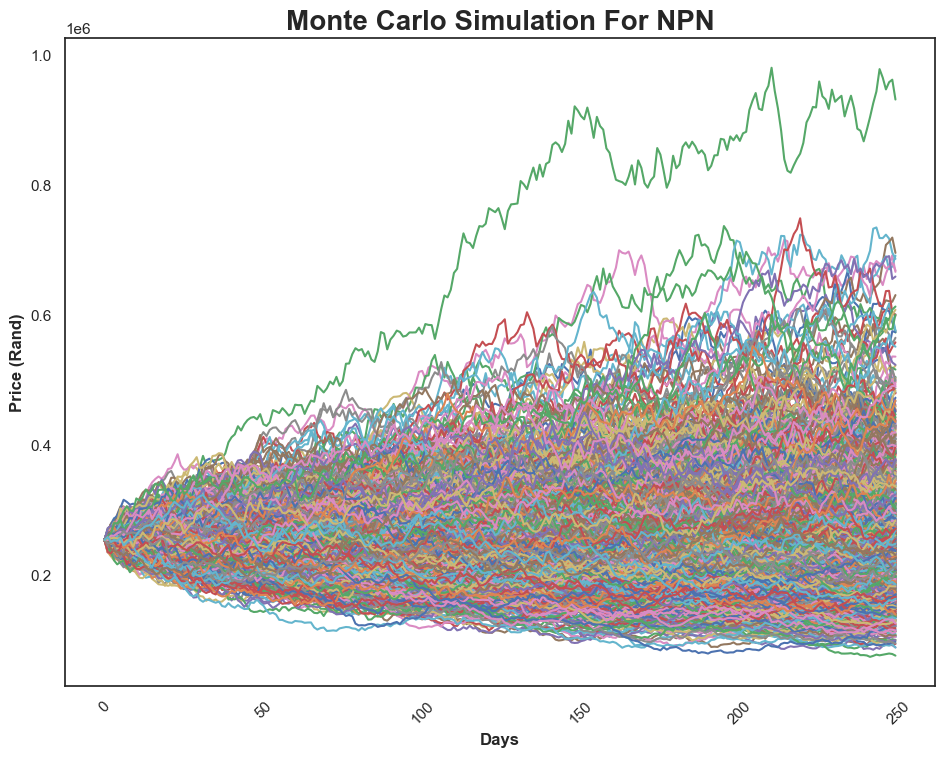

In [48]:
#NPN monte carlo simulation
#Creating a function for the time series chart
def monte_simulation(price_list, title):
    plt.plot(price_list)
    plt.title(title, fontsize = 20, fontweight = 'bold')
    plt.ylabel('Price (Rand)', fontweight = 'bold')
    plt.xlabel('Days', fontweight = 'bold')
    plt.xticks(rotation = 45)
    plt.show()
    
monte_simulation(price_list_npn, 'Monte Carlo Simulation For NPN')

In [49]:
#Iterating for BHP
for t in range(1, t_intervals):
    price_list_bhp[t] = price_list_bhp[t-1] * daily_returns_bhp[t]
    
print(price_list_bhp)

[[40150.         40150.         40150.         ... 40150.
  40150.         40150.        ]
 [40517.17642295 39191.07677689 40178.93841209 ... 40998.13749198
  39337.12166606 39649.97737893]
 [40461.21018879 39692.92696378 40543.89131477 ... 40964.03183558
  38119.75399986 38852.64492711]
 ...
 [67562.54013096 29269.10363938 52493.54063693 ... 41237.99089734
  44671.36591276 29857.6423506 ]
 [66789.97419251 28720.25365029 51797.33082482 ... 41158.99765353
  43489.78142662 29933.488269  ]
 [64106.33271057 28471.69826672 50622.54361755 ... 41527.87557712
  42741.99771687 29870.634583  ]]


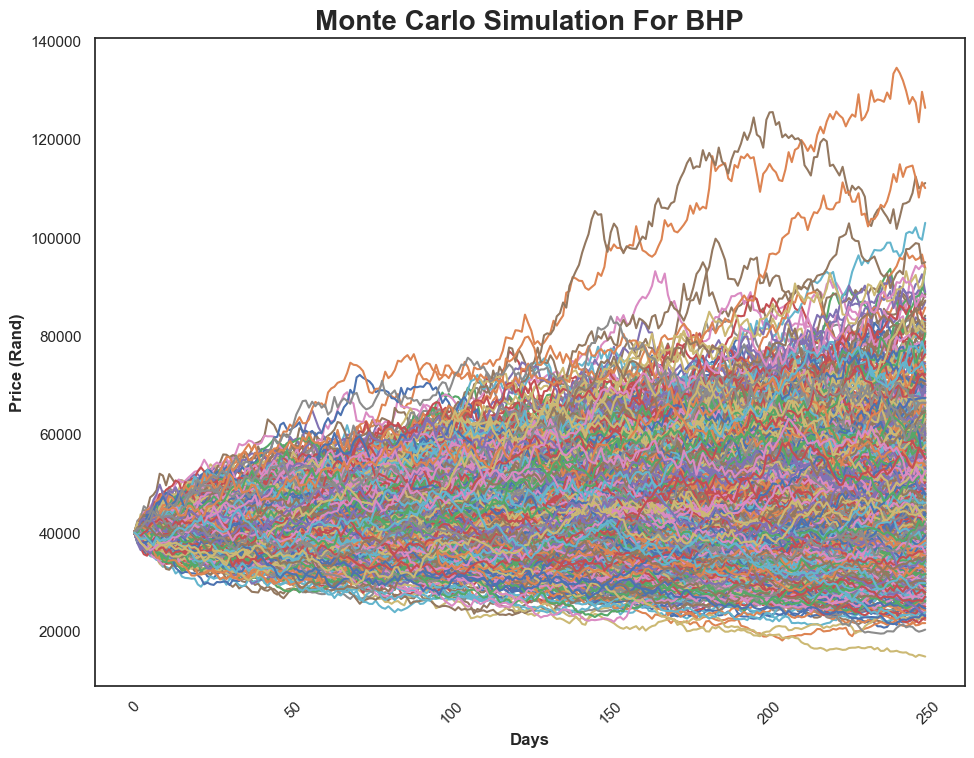

In [50]:
#BHP monte carlo simulation
monte_simulation(price_list_bhp, 'Monte Carlo Simulation For BHP')

In [51]:
#Iterating for CFR
for t in range(1, t_intervals):
    price_list_cfr[t] = price_list_cfr[t-1] * daily_returns_cfr[t]
    
print(price_list_cfr)

[[17326.         17326.         17326.         ... 17326.
  17326.         17326.        ]
 [17527.67987832 17402.69403883 17107.30092996 ... 17104.58402266
  17157.11047834 16783.86834073]
 [17662.95793376 17197.91409624 16855.75496574 ... 17321.88830019
  17078.80512019 16500.48971305]
 ...
 [20297.67628912  9610.9287107  20105.90706871 ... 20282.79885342
  12076.150986   18888.91882689]
 [20489.18337165  9403.40222126 20397.85902899 ... 20364.25990006
  12224.26068616 19173.81788762]
 [20789.14897381  9464.7980897  19894.31865724 ... 20330.15129286
  12434.93706935 19524.33203266]]


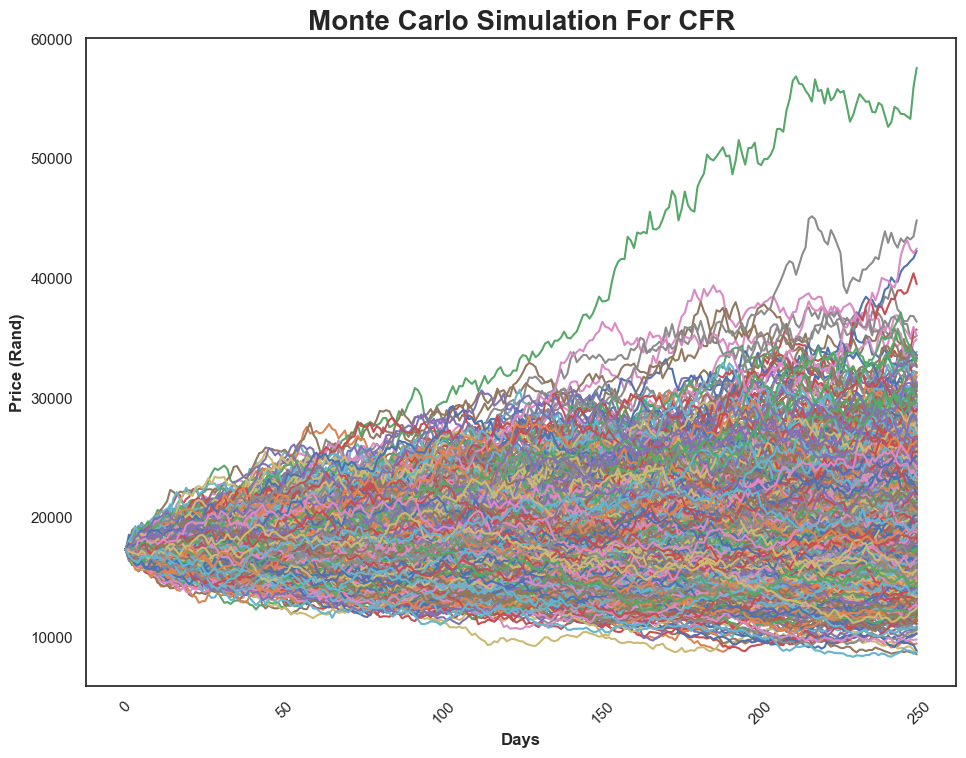

In [52]:
#CFR monte carlo simulation
monte_simulation(price_list_cfr, 'Monte Carlo Simulation For CFR')